<a href="https://colab.research.google.com/github/abhidhawale/MachineLearningProjects/blob/master/LogisticRegression_WeatherAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implement Logistic Regression algorithm "WeatherAUS" dataset
1. The target variable **RainTomorrow** means: Did it rain the
next day? Yes or No.
2. Split the data into Training and Testing parts: 80% for
training and 20% for testing.
3. Check Accuracy and Confusion matrix
4. Predict **RainTomorrow** by giving inputs:

* First input :

[4,17.9,35.2,0,12,12.3,11,48,1,12,6,20,20,13,1006.3,1004.4,2,5,26.6,33.4,0]

* Second input:

[15.0,46.0,23.0,1008.6,1008.3,2.0,6.0,28.1,33.2,1,5963,4,19.7,37.3,0.0,14.2,13.4,11,28.0,9,1]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('/content/Dataset-33-1-Logistic Regression-weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [ ]:
df.isnull().sum()

Date                 0
Location             1
MinTemp            349
MaxTemp            185
Rainfall           344
Evaporation      18496
Sunshine         22842
WindGustDir       4482
WindGustSpeed     4478
WindDir9am        4220
WindDir3pm        1894
WindSpeed9am       630
WindSpeed3pm      1279
Humidity9am        498
Humidity3pm       1166
Pressure9am       6414
Pressure3pm       6415
Cloud9am         15321
Cloud3pm         15664
Temp9am            279
Temp3pm            951
RainToday          344
RISK_MM              1
RainTomorrow         1
dtype: int64

In [ ]:
# Dropping all the rows that contain all NaN values 

df.dropna(inplace=True)
df.shape

(56420, 24)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_val = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
le = LabelEncoder()
for i in cat_val:
  df[i]= le.fit_transform(df[i])

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,01/01/2009,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0
5940,02/01/2009,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0.0,0
5942,04/01/2009,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0.0,0
5943,05/01/2009,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0.0,0
5944,06/01/2009,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0.0,0


# Spliting data into test and train sets

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["Date","RISK_MM","RainTomorrow"], axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 156)

In [ ]:
# scaling data
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()

X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

# Training Model

In [ ]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()

result = mod.fit(X_train, y_train)

In [ ]:
prediction = result.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

# Checking model performance

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8519142148174407

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, prediction)
conf_df = pd.DataFrame(conf_mat, index=['Actual negative','Actual positive'], columns=['Predicted negative','Predicted positive'])
conf_df

,Predicted negative,Predicted positive
Actual negative,8297,492
Actual positive,1179,1316


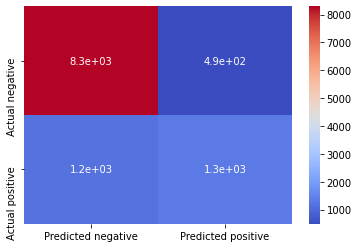

In [ ]:
color_conf_mat = sb.heatmap(conf_df, cmap='coolwarm', annot = True)

# Deploy model

In [ ]:
new_predict = result.predict([[4,17.9,35.2,0,12,12.3,11,48,1,12,6,20,20,13,1006.3,1004.4,2,5,26.6,33.4,0]])
new_predict

array([0])

In [ ]:
new_predict = result.predict([[15.0,46.0,23.0,1008.6,1008.3,2.0,6.0,28.1,33.2,1,5963,4,19.7,37.3,0.0,14.2,13.4,11,28.0,9,1]])
new_predict

array([0])

In [ ]:
new_predict = result.predict([[20,6.0,53.0,700.6,988.3,20,80,8.1,243.2,7,963,4,29.7,57.3,0.0,14.2,13.4,21,58.0,7,0]])
new_predict

array([1])